In [52]:
import os
path = '/Users/alessiogandelli/dev/internship/BERTopic_evaluation/myresults'

#read all files from this path 
files = os.listdir(path)




In [58]:
import pandas as pd 

df = pd.DataFrame()

for file in files:
    if file.endswith('.csv'):
        df = pd.concat([df, pd.read_csv(path + '/' + file)])

In [59]:
# rename model from climatebert/distilroberta-base-climate-f to climabert
df['model'] = df['model'].replace('climatebert/distilroberta-base-climate-f', 'climabert')
df['model'] = df['model'].replace('louisbetsch/tweetclassification-bf-model', 'tweet_classification')

In [60]:
# roudn every number to 2 decimal places
df = df.round(2)
# get only rowws that have or lda or nmf 
df_trad = df[(df['model'] == 'LDA') | (df['model'] == 'NMF')]
df_bert= df[(df['model'] == 'mini')| (df['model'] == 'openai') | (df['model'] == 'climabert') | (df['model'] == 'tweet_classification') | (df['model'] == 'use')]

df_bert

,dataset,model,nr_topics,min_topic_size,npmi,umass,diversity,computation_time
0,climate,mini,10,5.0,-0.09,-10.33,0.88,30.65
1,climate,mini,10,15.0,0.04,-7.54,0.88,18.05
2,climate,mini,20,5.0,0.04,-9.13,0.88,28.30
3,climate,mini,20,15.0,0.23,-5.08,0.99,18.41
4,climate,mini,30,5.0,0.03,-10.13,0.91,22.12
5,climate,mini,30,15.0,0.25,-4.56,0.98,22.31
6,climate,mini,40,5.0,0.05,-10.26,0.92,29.24
7,climate,mini,40,15.0,0.23,-5.08,0.99,18.34
8,climate,mini,50,5.0,0.08,-9.89,0.93,29.36
9,climate,mini,50,15.0,0.23,-5.08,0.99,17.22


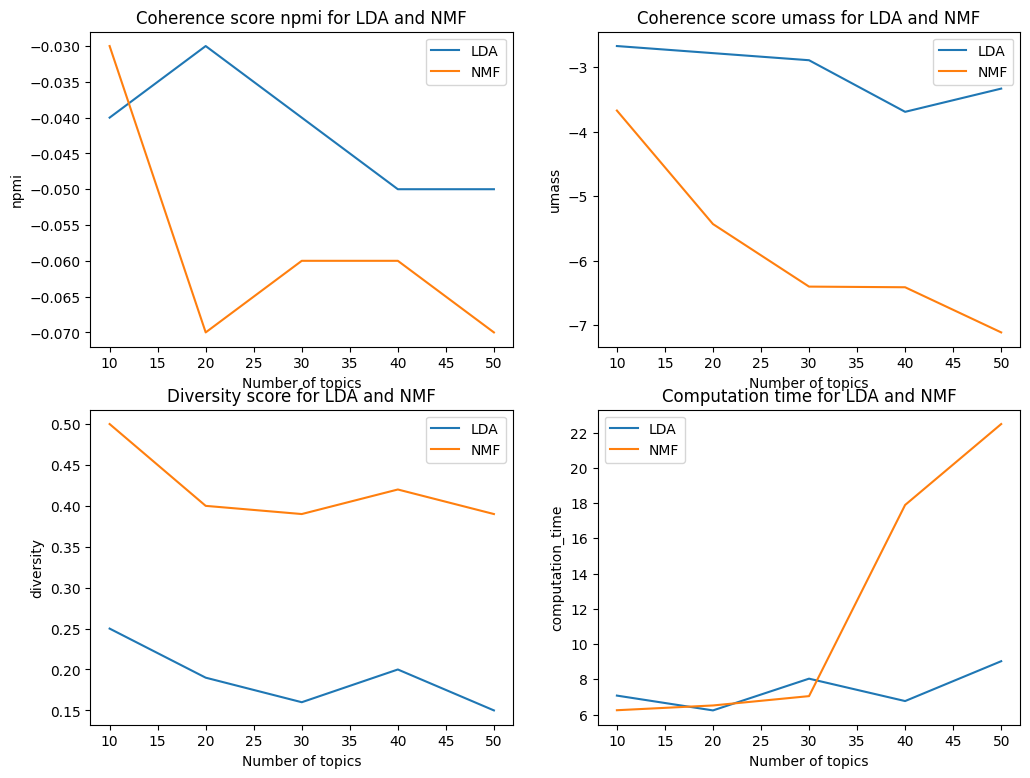

In [51]:
# plot on x the number of topics with one line per model 
import matplotlib.pyplot as plt

#4 subplots 
fig, axs = plt.subplots(2, 2, figsize=(12, 9))

# plot coherence score
axs[0, 0].plot(df_trad[df_trad['model'] == 'LDA']['nr_topics'], df_trad[df_trad['model'] == 'LDA']['npmi'], label='LDA')
axs[0, 0].plot(df_trad[df_trad['model'] == 'NMF']['nr_topics'], df_trad[df_trad['model'] == 'NMF']['npmi'], label='NMF')
axs[0, 0].legend()
axs[0, 0].set_xlabel('Number of topics')
axs[0, 0].set_ylabel('npmi')
axs[0, 0].set_title('Coherence score npmi for LDA and NMF')

# plot umass score
axs[0, 1].plot(df_trad[df_trad['model'] == 'LDA']['nr_topics'], df_trad[df_trad['model'] == 'LDA']['umass'], label='LDA')
axs[0, 1].plot(df_trad[df_trad['model'] == 'NMF']['nr_topics'], df_trad[df_trad['model'] == 'NMF']['umass'], label='NMF')
axs[0, 1].legend()
axs[0, 1].set_xlabel('Number of topics')
axs[0, 1].set_ylabel('umass')
axs[0, 1].set_title('Coherence score umass for LDA and NMF')

# plot diversity score
axs[1, 0].plot(df_trad[df_trad['model'] == 'LDA']['nr_topics'], df_trad[df_trad['model'] == 'LDA']['diversity'], label='LDA')
axs[1, 0].plot(df_trad[df_trad['model'] == 'NMF']['nr_topics'], df_trad[df_trad['model'] == 'NMF']['diversity'], label='NMF')
axs[1, 0].legend()
axs[1, 0].set_xlabel('Number of topics')
axs[1, 0].set_ylabel('diversity')
axs[1, 0].set_title('Diversity score for LDA and NMF')

# plot computation time

axs[1, 1].plot(df_trad[df_trad['model'] == 'LDA']['nr_topics'], df_trad[df_trad['model'] == 'LDA']['computation_time'], label='LDA')
axs[1, 1].plot(df_trad[df_trad['model'] == 'NMF']['nr_topics'], df_trad[df_trad['model'] == 'NMF']['computation_time'], label='NMF')
axs[1, 1].legend()
axs[1, 1].set_xlabel('Number of topics')
axs[1, 1].set_ylabel('computation_time')
axs[1, 1].set_title('Computation time for LDA and NMF')

plt.savefig(path+'/traditional_models.png')



In [71]:
df_bert5 = df_bert[df_bert['min_topic_size'] == 5]
df_bert15 = df_bert[df_bert['min_topic_size'] == 15]

In [73]:
# same as before but for bert models
def plot_bert(df_bert, min_topic_size):
    fig, axs = plt.subplots(2, 2, figsize=(12, 9))
    fig.suptitle('min_topic_size = ' + str(min_topic_size))

    # plot coherence score
    axs[0, 0].plot(df_bert[df_bert['model'] == 'mini']['nr_topics'], df_bert[df_bert['model'] == 'mini']['npmi'], label='mini')
    axs[0, 0].plot(df_bert[df_bert['model'] == 'openai']['nr_topics'], df_bert[df_bert['model'] == 'openai']['npmi'], label='openai')
    axs[0, 0].plot(df_bert[df_bert['model'] == 'climabert']['nr_topics'], df_bert[df_bert['model'] == 'climabert']['npmi'], label='climabert')
    axs[0, 0].plot(df_bert[df_bert['model'] == 'tweet_classification']['nr_topics'], df_bert[df_bert['model'] == 'tweet_classification']['npmi'], label='tweet_classification')
    axs[0, 0].plot(df_bert[df_bert['model'] == 'use']['nr_topics'], df_bert[df_bert['model'] == 'use']['npmi'], label='use')
    axs[0, 0].legend()

    axs[0, 0].set_xlabel('Number of topics')
    axs[0, 0].set_ylabel('npmi')
    axs[0, 0].set_title('Coherence score npmi for bertopic')

    # plot umass score
    axs[0, 1].plot(df_bert[df_bert['model'] == 'mini']['nr_topics'], df_bert[df_bert['model'] == 'mini']['umass'], label='mini')
    axs[0, 1].plot(df_bert[df_bert['model'] == 'openai']['nr_topics'], df_bert[df_bert['model'] == 'openai']['umass'], label='openai')
    axs[0, 1].plot(df_bert[df_bert['model'] == 'climabert']['nr_topics'], df_bert[df_bert['model'] == 'climabert']['umass'], label='climabert')
    axs[0, 1].plot(df_bert[df_bert['model'] == 'tweet_classification']['nr_topics'], df_bert[df_bert['model'] == 'tweet_classification']['umass'], label='tweet_classification')
    axs[0, 1].plot(df_bert[df_bert['model'] == 'use']['nr_topics'], df_bert[df_bert['model'] == 'use']['umass'], label='use')
    axs[0, 1].legend()
    axs[0, 1].set_xlabel('Number of topics')
    axs[0, 1].set_ylabel('umass')
    axs[0, 1].set_title('Coherence score umass for bertopic')

    # plot diversity score
    axs[1, 0].plot(df_bert[df_bert['model'] == 'mini']['nr_topics'], df_bert[df_bert['model'] == 'mini']['diversity'], label='mini')
    axs[1, 0].plot(df_bert[df_bert['model'] == 'openai']['nr_topics'], df_bert[df_bert['model'] == 'openai']['diversity'], label='openai')
    axs[1, 0].plot(df_bert[df_bert['model'] == 'climabert']['nr_topics'], df_bert[df_bert['model'] == 'climabert']['diversity'], label='climabert')
    axs[1, 0].plot(df_bert[df_bert['model'] == 'tweet_classification']['nr_topics'], df_bert[df_bert['model'] == 'tweet_classification']['diversity'], label='tweet_classification')
    axs[1, 0].plot(df_bert[df_bert['model'] == 'use']['nr_topics'], df_bert[df_bert['model'] == 'use']['diversity'], label='use')
    axs[1, 0].legend()
    axs[1, 0].set_xlabel('Number of topics')
    axs[1, 0].set_ylabel('diversity')
    axs[1, 0].set_title('Diversity score for bertopic')

    # plot computation time

    axs[1, 1].plot(df_bert[df_bert['model'] == 'mini']['nr_topics'], df_bert[df_bert['model'] == 'mini']['computation_time'], label='mini')
    axs[1, 1].plot(df_bert[df_bert['model'] == 'openai']['nr_topics'], df_bert[df_bert['model'] == 'openai']['computation_time'], label='openai')
    axs[1, 1].plot(df_bert[df_bert['model'] == 'climabert']['nr_topics'], df_bert[df_bert['model'] == 'climabert']['computation_time'], label='climabert')
    axs[1, 1].plot(df_bert[df_bert['model'] == 'tweet_classification']['nr_topics'], df_bert[df_bert['model'] == 'tweet_classification']['computation_time'], label='tweet_classification')
    axs[1, 1].plot(df_bert[df_bert['model'] == 'use']['nr_topics'], df_bert[df_bert['model'] == 'use']['computation_time'], label='use')
    axs[1, 1].legend()
    axs[1, 1].set_xlabel('Number of topics')
    axs[1, 1].set_ylabel('computation_time')
    axs[1, 1].set_title('Computation time for bertopic')

    plt.savefig(path + '/bertopic_models' + str(min_topic_size) + '.png')


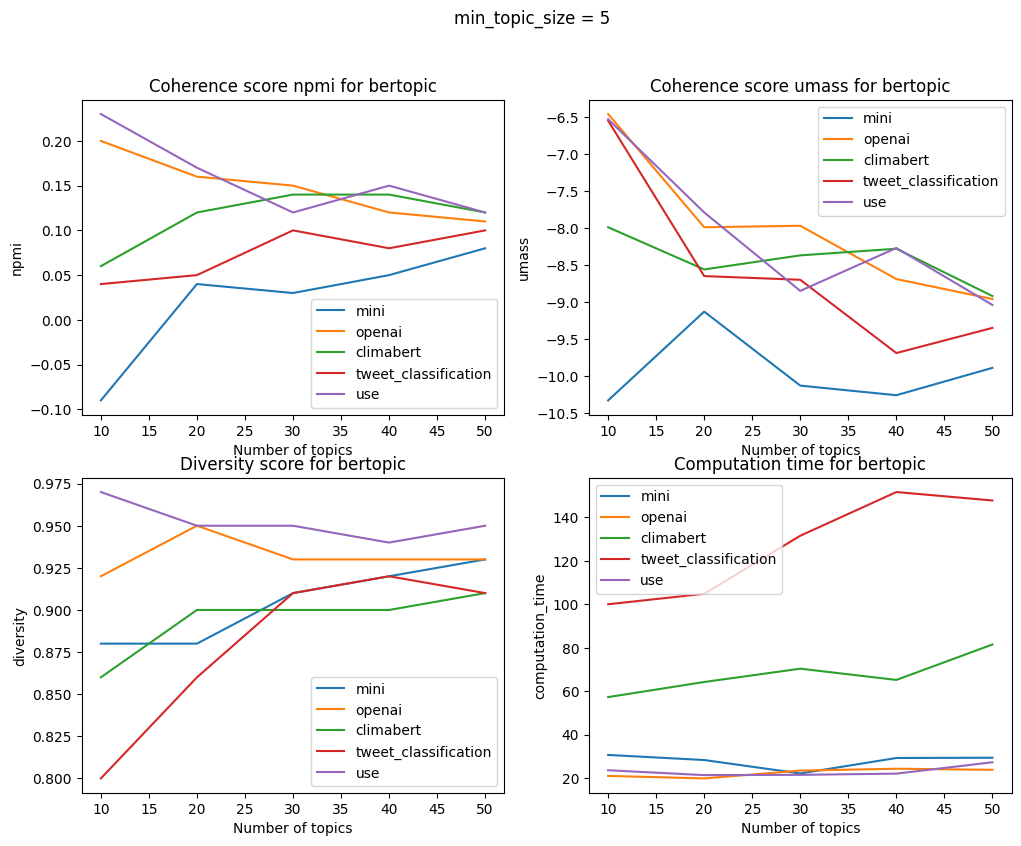

In [74]:
plot_bert(df_bert5, 5)


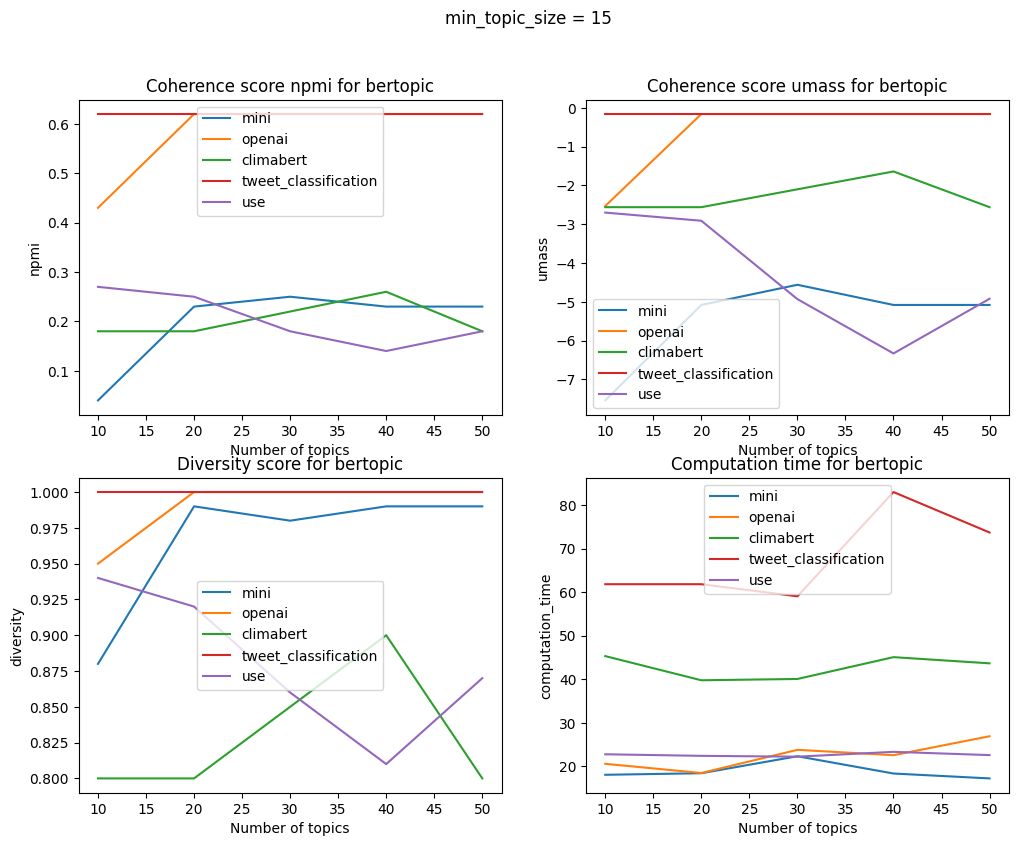

In [75]:
plot_bert(df_bert15, 15)

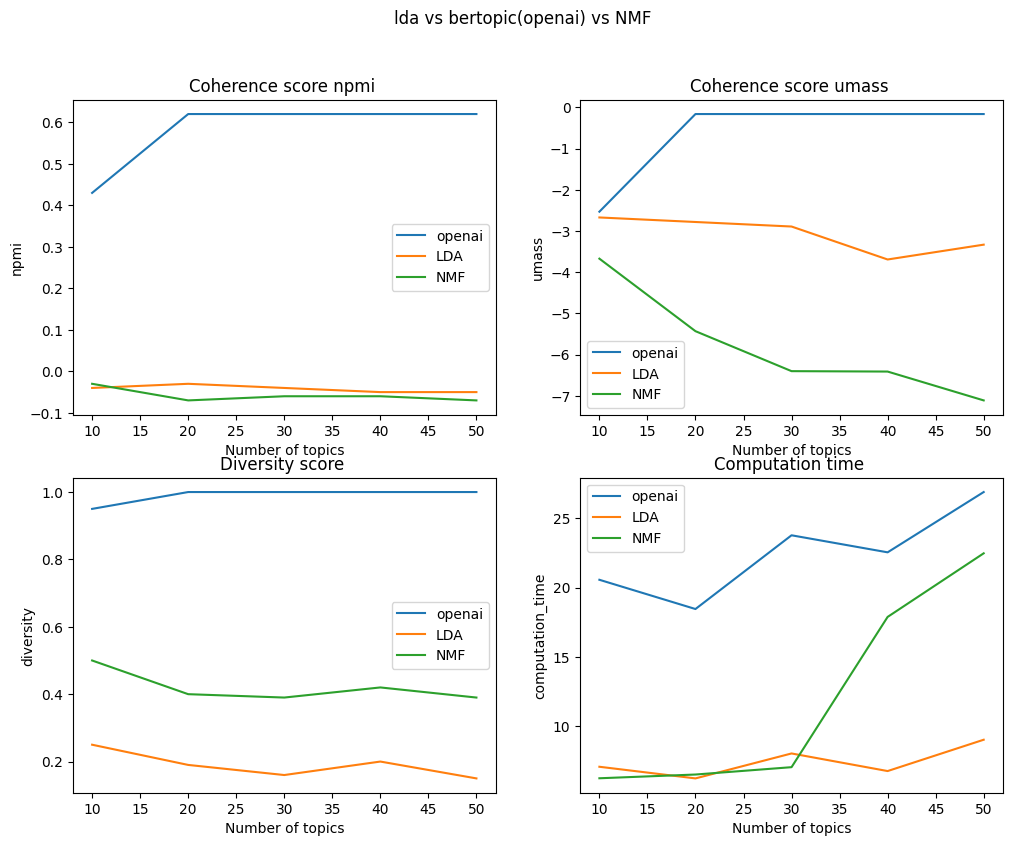

In [87]:
# compare openai and lda 
fig, axs = plt.subplots(2, 2, figsize=(12, 9))
fig.suptitle('lda vs bertopic(openai) vs NMF')
df_bert = df_bert15

# plot coherence score
axs[0, 0].plot(df_bert[df_bert['model'] == 'openai']['nr_topics'], df_bert[df_bert['model'] == 'openai']['npmi'], label='openai')
axs[0, 0].plot(df_trad[df_trad['model'] == 'LDA']['nr_topics'], df_trad[df_trad['model'] == 'LDA']['npmi'], label='LDA')
axs[0, 0].plot(df_trad[df_trad['model'] == 'NMF']['nr_topics'], df_trad[df_trad['model'] == 'NMF']['npmi'], label='NMF')
axs[0, 0].legend()

axs[0, 0].set_xlabel('Number of topics')
axs[0, 0].set_ylabel('npmi')
axs[0, 0].set_title('Coherence score npmi ')

# plot umass score
axs[0, 1].plot(df_bert[df_bert['model'] == 'openai']['nr_topics'], df_bert[df_bert['model'] == 'openai']['umass'], label='openai')
axs[0, 1].plot(df_trad[df_trad['model'] == 'LDA']['nr_topics'], df_trad[df_trad['model'] == 'LDA']['umass'], label='LDA')
axs[0, 1].plot(df_trad[df_trad['model'] == 'NMF']['nr_topics'], df_trad[df_trad['model'] == 'NMF']['umass'], label='NMF')

axs[0, 1].legend()
axs[0, 1].set_xlabel('Number of topics')
axs[0, 1].set_ylabel('umass')
axs[0, 1].set_title('Coherence score umass ')

# plot diversity score
axs[1, 0].plot(df_bert[df_bert['model'] == 'openai']['nr_topics'], df_bert[df_bert['model'] == 'openai']['diversity'], label='openai')
axs[1, 0].plot(df_trad[df_trad['model'] == 'LDA']['nr_topics'], df_trad[df_trad['model'] == 'LDA']['diversity'], label='LDA')
axs[1, 0].plot(df_trad[df_trad['model'] == 'NMF']['nr_topics'], df_trad[df_trad['model'] == 'NMF']['diversity'], label='NMF')
axs[1, 0].legend()
axs[1, 0].set_xlabel('Number of topics')
axs[1, 0].set_ylabel('diversity')
axs[1, 0].set_title('Diversity score ')

# plot computation time
axs[1, 1].plot(df_bert[df_bert['model'] == 'openai']['nr_topics'], df_bert[df_bert['model'] == 'openai']['computation_time'], label='openai')
axs[1, 1].plot(df_trad[df_trad['model'] == 'LDA']['nr_topics'], df_trad[df_trad['model'] == 'LDA']['computation_time'], label='LDA')
axs[1, 1].plot(df_trad[df_trad['model'] == 'NMF']['nr_topics'], df_trad[df_trad['model'] == 'NMF']['computation_time'], label='NMF')
axs[1, 1].legend()
axs[1, 1].set_xlabel('Number of topics')
axs[1, 1].set_ylabel('computation_time')
axs[1, 1].set_title('Computation time ')

plt.savefig(path+'/bertopic_vs_lda.png')

In [80]:
df[df['model'] == 'Top2Vec']

,dataset,model,nr_topics,min_topic_size,npmi,umass,diversity,computation_time
0,climate,Top2Vec,3,15.0,-0.08,-3.84,0.77,50.87
1,climate,Top2Vec,4,15.0,-0.12,-4.84,0.65,47.05
2,climate,Top2Vec,5,15.0,-0.14,-5.26,0.64,65.17
3,climate,Top2Vec,8,15.0,-0.13,-5.46,0.39,51.66
4,climate,Top2Vec,9,15.0,-0.12,-5.20,0.37,52.16
